In [45]:
# Import the libraries
# Pandas is high-performance, easy-to-use data structures and data analysis tools for the Python programming language
import pandas as pd

# Numpy is the fundamental package for scientific computing with Python
import numpy as np

# Matplotlib is used for graphs
import matplotlib.pyplot as plt

# seaborn Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics
import seaborn as sns

# %matplotlib inline is magic command. This performs the necessary behind-the-scenes setup for IPython to work correctly hand in hand with matplotlib
%matplotlib inline

# For a normal continuous random variable
from scipy.stats import norm
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor

In [2]:
# Reading the test and train csv files
train = pd.read_csv(r'D:\Projects\House Prices\train.csv')
test = pd.read_csv(r'D:\Projects\House Prices\test.csv')

# This is being done to increse the visibility of table in jupyter notebook

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#Viewing the first few observations of training dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


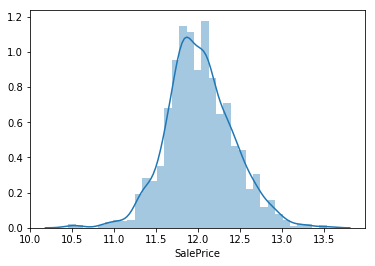

In [4]:
# Doing log transformation of sales price
train['SalePrice']=np.log(train['SalePrice'])
sns.distplot(train['SalePrice']);
# Fill in your code for transformation

In [5]:
# Dropping Id column from both train and test as it won't be of any use
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

In [6]:
# Creating empty list
cols_to_norm =[]
cols_to_norm_test=[]
cols_to_no =[]
cols_to_no_test=[]

In [7]:
# To check which columns has NAs
# Replacing Numeric columns of train data with the mean and categorical columns with mode
for col in train.columns:
    if train[col].isnull().values.any() == True:
        if np.issubdtype(train[col].dtype, np.number) == True:
            train[col].fillna((train[col].mean()), inplace=True)
        else:
            train[col].fillna((train[col].value_counts().index[0]), inplace=True)

# Replacing Numeric columns of train data with the mean and categorical columns with mode
for col in test.columns:
    if test[col].isnull().values.any() == True:
        if np.issubdtype(test[col].dtype, np.number) == True:
            test[col].fillna((train[col].mean()), inplace=True)
        else:
            test[col].fillna((train[col].value_counts().index[0]), inplace=True)

# Storing categolical and numelical column names for both test and train in different lists
for col in train.columns:
    if np.issubdtype(train[col].dtype, np.number) == False:
        cols_to_norm.append(col) # Storing categorical column name
    else:
        cols_to_no.append(col) # Storing numerical column name
        
for col in test.columns:
    if np.issubdtype(test[col].dtype, np.number) == False:
        cols_to_norm_test.append(col) # Storing categorical column name
    else:
        cols_to_no_test.append(col) # Storing numerical column name

In [8]:
# Appending sales price to list of categorical variables and removing it from list of numeric variables
# As we wont be normalizing Salesprice
cols_to_norm.append('SalePrice')

In [9]:
cols_to_no=cols_to_no[:-1]

In [10]:
#Normalizing the rest of the variables as well 
from sklearn.preprocessing import normalize
scaler = normalize(train.drop(train[cols_to_norm],axis=1))
df_train = pd.DataFrame(scaler,columns=cols_to_no)
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.006206,0.006724,0.874061,0.000724,0.000517,0.207189,0.207189,0.020274,0.073028,0.0,0.015516,0.088544,0.088544,0.088337,0.0,0.176881,0.000103,0.000000,0.000207,0.000103,0.000310,0.000103,0.000828,0.000000,0.207189,0.000207,0.056685,0.000000,0.006310,0.000000,0.0,0.0,0.0,0.0,0.000207,0.207706
1,0.001873,0.007492,0.899027,0.000562,0.000749,0.185050,0.185050,0.000000,0.091588,0.0,0.026596,0.118185,0.118185,0.000000,0.0,0.118185,0.000000,0.000094,0.000187,0.000000,0.000281,0.000094,0.000562,0.000094,0.185050,0.000187,0.043078,0.027907,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000468,0.187953
2,0.004914,0.005569,0.921408,0.000573,0.000410,0.163888,0.163970,0.013268,0.039805,0.0,0.035546,0.075351,0.075351,0.070928,0.0,0.146279,0.000082,0.000000,0.000164,0.000082,0.000246,0.000082,0.000491,0.000082,0.163888,0.000164,0.049797,0.000000,0.003440,0.000000,0.0,0.0,0.0,0.0,0.000737,0.164461
3,0.006596,0.005654,0.899920,0.000660,0.000471,0.180455,0.185638,0.000000,0.020354,0.0,0.050886,0.071240,0.090557,0.071240,0.0,0.161797,0.000094,0.000000,0.000094,0.000000,0.000283,0.000094,0.000660,0.000094,0.188277,0.000283,0.060497,0.000000,0.003298,0.025631,0.0,0.0,0.0,0.0,0.000188,0.189030
4,0.003961,0.005545,0.941327,0.000528,0.000330,0.132023,0.132023,0.023104,0.043238,0.0,0.032346,0.075583,0.075583,0.069510,0.0,0.145094,0.000066,0.000000,0.000132,0.000066,0.000264,0.000066,0.000594,0.000066,0.132023,0.000198,0.055186,0.012674,0.005545,0.000000,0.0,0.0,0.0,0.0,0.000792,0.132551


In [11]:
#Normalzing the numerical variables
from sklearn.preprocessing import normalize
scaler_t = normalize(test.drop(test[cols_to_norm_test],axis=1))
df_test = pd.DataFrame(scaler_t,columns=cols_to_no_test)
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.001612,0.006448,0.936778,0.000403,0.000484,0.158064,0.158064,0.000000,0.037723,0.011607,0.021763,0.071093,0.072221,0.000000,0.0,0.072221,0.0,0.0,0.000081,0.000000,0.000161,0.000081,0.000403,0.000000,0.158064,0.000081,0.058841,0.011285,0.000000,0.0,0.0,0.009672,0.0,0.000000,0.000484,0.162014
1,0.001023,0.004145,0.730034,0.000307,0.000307,0.100190,0.100190,0.005526,0.047229,0.000000,0.020775,0.068004,0.068004,0.000000,0.0,0.068004,0.0,0.0,0.000051,0.000051,0.000154,0.000051,0.000307,0.000000,0.100190,0.000051,0.015965,0.020110,0.001842,0.0,0.0,0.000000,0.0,0.639618,0.000307,0.102851
2,0.004110,0.005069,0.947446,0.000343,0.000343,0.136808,0.136876,0.000000,0.054189,0.000000,0.009385,0.063574,0.063574,0.048023,0.0,0.111597,0.0,0.0,0.000137,0.000069,0.000206,0.000069,0.000411,0.000069,0.136808,0.000137,0.033020,0.014523,0.002329,0.0,0.0,0.000000,0.0,0.000000,0.000206,0.137698
3,0.005451,0.007086,0.906516,0.000545,0.000545,0.181521,0.181521,0.001817,0.054693,0.000000,0.029436,0.084128,0.084128,0.061597,0.0,0.145726,0.0,0.0,0.000182,0.000091,0.000273,0.000091,0.000636,0.000091,0.181521,0.000182,0.042700,0.032707,0.003271,0.0,0.0,0.000000,0.0,0.000000,0.000545,0.182611
4,0.017446,0.006251,0.727637,0.001163,0.000727,0.289601,0.289601,0.000000,0.038235,0.000000,0.147853,0.186089,0.186089,0.000000,0.0,0.186089,0.0,0.0,0.000291,0.000000,0.000291,0.000145,0.000727,0.000000,0.289601,0.000291,0.073563,0.000000,0.011921,0.0,0.0,0.020935,0.0,0.000000,0.000145,0.292218


In [12]:
#Concatenating both training and datasets 
df_train=pd.concat([df_train, train[cols_to_norm]], axis=1)

In [13]:
df_test=pd.concat([df_test, test[cols_to_norm_test]], axis=1)

In [14]:
print(df_train.shape)
print(df_test.shape)

(1460, 80)
(1459, 79)


In [15]:
# Creating dummy variables for train and Test
for col in df_train.columns:
    if np.issubdtype(df_train[col].dtype, np.number) == False:
        Col = pd.get_dummies(df_train[col])
        df_train.drop([col],axis=1,inplace=True)
        Col = Col.add_suffix(col)
        df_train = pd.concat([df_train,Col],axis=1)
for col in df_test.columns:
    if np.issubdtype(df_test[col].dtype, np.number) == False:
        Col = pd.get_dummies(df_test[col])
        df_test.drop([col],axis=1,inplace=True)
        Col = Col.add_suffix(col)
        df_test = pd.concat([df_test,Col],axis=1)

In [16]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,C (all)MSZoning,FVMSZoning,RHMSZoning,RLMSZoning,RMMSZoning,GrvlStreet,PaveStreet,GrvlAlley,PaveAlley,IR1LotShape,IR2LotShape,IR3LotShape,RegLotShape,BnkLandContour,HLSLandContour,LowLandContour,LvlLandContour,AllPubUtilities,NoSeWaUtilities,CornerLotConfig,CulDSacLotConfig,FR2LotConfig,FR3LotConfig,InsideLotConfig,GtlLandSlope,ModLandSlope,SevLandSlope,BlmngtnNeighborhood,BluesteNeighborhood,BrDaleNeighborhood,BrkSideNeighborhood,ClearCrNeighborhood,CollgCrNeighborhood,CrawforNeighborhood,EdwardsNeighborhood,GilbertNeighborhood,IDOTRRNeighborhood,MeadowVNeighborhood,MitchelNeighborhood,NAmesNeighborhood,NPkVillNeighborhood,NWAmesNeighborhood,NoRidgeNeighborhood,NridgHtNeighborhood,OldTownNeighborhood,SWISUNeighborhood,SawyerNeighborhood,SawyerWNeighborhood,SomerstNeighborhood,StoneBrNeighborhood,TimberNeighborhood,VeenkerNeighborhood,ArteryCondition1,FeedrCondition1,NormCondition1,PosACondition1,PosNCondition1,RRAeCondition1,RRAnCondition1,RRNeCondition1,RRNnCondition1,ArteryCondition2,FeedrCondition2,NormCondition2,PosACondition2,PosNCondition2,RRAeCondition2,RRAnCondition2,RRNnCondition2,1FamBldgType,2fmConBldgType,DuplexBldgType,TwnhsBldgType,TwnhsEBldgType,1.5FinHouseStyle,1.5UnfHouseStyle,1StoryHouseStyle,2.5FinHouseStyle,2.5UnfHouseStyle,2StoryHouseStyle,SFoyerHouseStyle,SLvlHouseStyle,FlatRoofStyle,GableRoofStyle,GambrelRoofStyle,HipRoofStyle,MansardRoofStyle,ShedRoofStyle,ClyTileRoofMatl,CompShgRoofMatl,MembranRoofMatl,MetalRoofMatl,RollRoofMatl,Tar&GrvRoofMatl,WdShakeRoofMatl,WdShnglRoofMatl,AsbShngExterior1st,AsphShnExterior1st,BrkCommExterior1st,BrkFaceExterior1st,CBlockExterior1st,CemntBdExterior1st,HdBoardExterior1st,ImStuccExterior1st,MetalSdExterior1st,PlywoodExterior1st,StoneExterior1st,StuccoExterior1st,VinylSdExterior1st,Wd SdngExterior1st,WdShingExterior1st,AsbShngExterior2nd,AsphShnExterior2nd,Brk CmnExterior2nd,BrkFaceExterior2nd,CBlockExterior2nd,CmentBdExterior2nd,HdBoardExterior2nd,ImStuccExterior2nd,MetalSdExterior2nd,OtherExterior2nd,PlywoodExterior2nd,StoneExterior2nd,StuccoExterior2nd,VinylSdExterior2nd,Wd SdngExterior2nd,Wd ShngExterior2nd,BrkCmnMasVnrType,BrkFaceMasVnrType,NoneMasVnrType,StoneMasVnrType,ExExterQual,FaExterQual,GdExterQual,TAExterQual,ExExterCond,FaExterCond,GdExterCond,PoExterCond,TAExterCond,BrkTilFoundation,CBlockFoundation,PConcFoundation,SlabFoundation,StoneFoundation,WoodFoundation,ExBsmtQual,FaBsmtQual,GdBsmtQual,TABsmtQual,FaBsmtCond,GdBsmtCond,PoBsmtCond,TABsmtCond,AvBsmtExposure,GdBsmtExposure,MnBsmtExposure,NoBsmtExposure,ALQBsmtFinType1,BLQBsmtFinType1,GLQBsmtFinType1,LwQBsmtFinType1,RecBsmtFinType1,UnfBsmtFinType1,ALQBsmtFinType2,BLQBsmtFinType2,GLQBsmtFinType2,LwQBsmtFinType2,RecBsmtFinType2,UnfBsmtFinType2,FloorHeating,GasAHeating,GasWHeating,GravHeating,OthWHeating,WallHeating,ExHeatingQC,FaHeatingQC,GdHeatingQC,PoHeatingQC,TAHeatingQC,NCentralAir,YCentralAir,FuseAElectrical,FuseFElectrical,FusePElectrical,MixElectrical,SBrkrElectrical,ExKitchenQual,FaKitchenQual,GdKitchenQual,TAKitchenQual,Maj1Functional,Maj2Functional,Min1Functional,Min2Functional,ModFunctional,SevFunctional,TypFunctional,ExFireplaceQu,FaFireplaceQu,GdFireplaceQu,PoFireplaceQu,TAFireplaceQu,2TypesGarageType,AttchdGarageType,BasmentGarageType,BuiltInGarageType,CarPortGarageType,DetchdGarageType,FinGarageFinish,RFnGarageFinish,UnfGarageFinish,ExGarageQual,FaGarageQual,GdGarageQual,PoGarageQual,TAGarageQual,ExGarageCond,FaGarageCond,GdGarageCond,PoGarageCond,TAGarageCond,NPavedDrive,PPavedDrive,YPavedDrive,ExPoolQC,FaPoolQC,GdPoolQC,GdPrvFence,GdWoFence,MnPrvFence,MnWwFence,Gar2MiscFeature,OthrMiscFeatur

In [17]:
#Removing training dataset from X 
X= df_train.drop('SalePrice',axis=1)

In [18]:
#Creating only y with Sale Price as column
y = df_train['SalePrice']

In [19]:

print(X.shape)
print(df_test.shape)

(1460, 288)
(1459, 270)


In [20]:
#If columns in both training and test are not same, then we should make them same
for col in X.columns:
    #print(col)
    if col not in df_test.columns:
        #print(col)
        df_test[col]=0

In [21]:

print(X.shape)
print(df_test.shape)

(1460, 288)
(1459, 288)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
ridgeRegCV=RidgeCV(alphas=alphas,scoring='neg_mean_squared_error',store_cv_values="True")

In [24]:
Score = []
MSE = []

In [ ]:
#Modeling Phase starts

In [25]:
#Running Ridge Regression
for i in alphas:
    RidReg = Ridge(alpha=i)
    RidReg.fit(X_train,y_train)
    Score.append(RidReg.score(X_test,y_test))
    # calculating and ploating MSE Error
    Pred_CV = RidReg.predict(X_test)
    mse = np.mean((Pred_CV - y_test)**2)
    MSE.append(mse)

In [26]:
#Print R-Sq value for Ridge Regression
print(Score) # R- Square Value 
print(MSE)

[0.8520050697594896, 0.8504526540671067, 0.8446568949259119, 0.8289561834171795, 0.8066997774257123, 0.7950167439975905, 0.7777087567805844, 0.7664124678272866, 0.7440732179287183, 0.7244709133148575, 0.7066765524905523]
[0.024877756930841866, 0.025138716006858637, 0.02611297564473967, 0.028752245002958518, 0.03249351815001866, 0.034457421003767585, 0.03736687133593131, 0.0392657629421775, 0.043020962043192314, 0.046316084171196585, 0.04930729327955822]


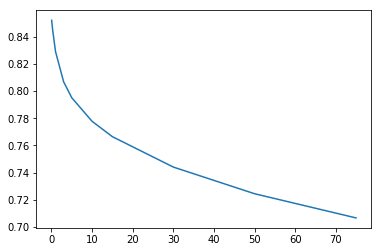

In [27]:
#Plotting alpha value vs R-Sq 
plt.plot(alphas,Score)# Alpha vs R Square.

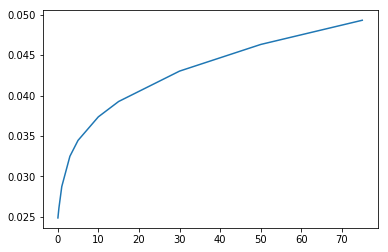

In [28]:
plt.plot(alphas,MSE)

In [29]:
#RidgeCV Regression Model
ridgeRegCV.fit(X_train,y_train)
#print(model.score(X_test,y_test))
print(ridgeRegCV.alpha_) # Best results

0.3


In [30]:
# Creating a prediction model for Test set
RidReg = Ridge(alpha=ridgeRegCV.alpha_)
RidReg.fit(X_train,y_train)
# Prediction model for test data
Pred_CV = RidReg.predict(df_test)
Pred_CV

array([11.82932762, 11.28125642, 11.70848772, ..., 11.63905642,
       11.58564495, 11.73126202])

In [31]:
np.exp(Pred_CV)

array([137218.19699549,  79320.85934085, 121599.44887917, ...,
       113443.07190626, 107542.882237  , 124400.56789232])

In [32]:
#Lasso Regression Model
Lasso_Model = LassoCV(alphas=alphas, max_iter=5000,n_alphas=11)
Lasso_Model.fit(X_train,y_train)

C:\Users\dhruv\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75], copy_X=True,
    cv='warn', eps=0.001, fit_intercept=True, max_iter=5000, n_alphas=11,
    n_jobs=None, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [34]:
print(Lasso_Model.alpha_) # Best Tuning parameter

0.05


In [35]:
Score = []
MSE=[]

In [36]:
for i in alphas:
    LassoReg = Lasso(alpha=i)
    LassoReg.fit(X_train,y_train)
    Pred_CV = LassoReg.predict(X_test)
    Score.append(LassoReg.score(X_test,y_test))
    # calculating and ploating MSE Error
    #Pred_CV = LassoReg.predict(X_test)
    mse = np.mean((Pred_CV - y_test)**2)
    MSE.append(mse)

In [37]:
print(MSE)

[0.10931088851602, 0.14870321441162898, 0.16836642023629672, 0.16836642023629672, 0.16836642023629672, 0.16836642023629672, 0.16836642023629672, 0.16836642023629672, 0.16836642023629672, 0.16836642023629672, 0.16836642023629672]


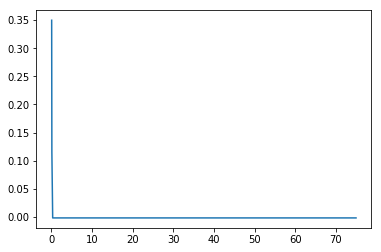

In [38]:
plt.plot(alphas,Score)

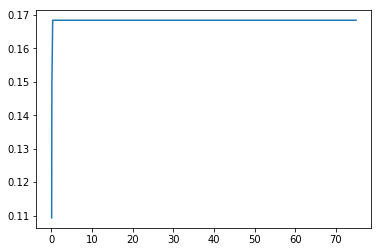

In [39]:

plt.plot(alphas,MSE)

In [40]:
# Creating a prediction model for Test set
LassoReg = Lasso(alpha=Lasso_Model.alpha_) 
LassoReg.fit(X_train,y_train)
# calculating and ploating MSE Error
Pred_CV = LassoReg.predict(df_test)
Pred_CV

array([12.23525675, 12.23525675, 12.23525675, ..., 12.23525675,
       12.23747673, 12.18755788])

In [41]:
np.exp(Pred_CV)

array([205922.82756297, 205922.82756297, 205922.82756297, ...,
       205922.82756297, 206380.47965303, 196331.11627982])

In [ ]:
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

In [46]:
#XGBoost Regression Model
xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [47]:
xgb_model_full_data = xgboost.fit(X, y)

C:\Users\dhruv\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\dhruv\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [52]:
score = cv_rmse(xgboost)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )


C:\Users\dhruv\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\dhruv\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\dhruv\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\dhruv\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\dhruv\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\dhruv\Anaco

Xgboost score: 0.1311 (0.0153)
 2019-04-13 00:52:06.007074


In [64]:
submissions = pd.read_csv(r'D:\Projects\House Prices\sample_submission.csv')

In [66]:
y_pred = xgboost.predict(X_test)

In [67]:
y_pred

array([12.429494 , 11.893793 , 11.886862 , 12.909712 , 12.866219 ,
       11.656088 , 11.793962 , 11.896395 , 11.909658 , 11.892742 ,
       11.677859 , 11.884632 , 11.792929 , 12.015018 , 11.944835 ,
       11.996832 , 11.764792 , 11.696446 , 12.035123 , 12.304667 ,
       11.892863 , 10.492136 , 12.163289 , 11.925687 , 12.404286 ,
       11.899731 , 11.691443 , 11.924612 , 12.099876 , 11.537526 ,
       12.238598 , 12.029022 , 12.094008 , 12.590497 , 10.507866 ,
       11.594222 , 12.922848 , 12.245026 , 11.768239 , 11.4705305,
       12.44192  , 12.173631 , 12.315709 , 12.074062 , 11.595729 ,
       11.900147 , 12.6542635, 12.123125 , 11.644063 , 11.481176 ,
       11.760316 , 12.454042 , 11.754721 , 12.064002 , 12.095021 ,
       11.795438 , 12.198147 , 12.3103485, 12.0660515, 12.327901 ,
       12.2027235, 11.920668 , 11.865281 , 11.372315 , 11.6380625,
       12.115641 , 11.457109 , 12.333084 , 12.01948  , 12.139249 ,
       12.035022 , 11.860554 , 12.250948 , 12.016051 , 11.6827

In [70]:
q1 = submission['SalePrice'].quantile(0.005)
q2 = submission['SalePrice'].quantile(0.995)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
submission.to_csv("D:\Projects\House Prices\submission.csv", index=False)

In [69]:
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [74]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, interaction_only=True)
output_nparray = poly.fit_transform(X)
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(X.columns, p) for p in poly.powers_]]
output_df = pd.DataFrame(output_nparray, columns=target_feature_names)

In [76]:
output_df.head()


,,MSSubClass^1,LotFrontage^1,LotArea^1,OverallQual^1,OverallCond^1,YearBuilt^1,YearRemodAdd^1,MasVnrArea^1,BsmtFinSF1^1,BsmtFinSF2^1,BsmtUnfSF^1,TotalBsmtSF^1,1stFlrSF^1,2ndFlrSF^1,LowQualFinSF^1,GrLivArea^1,BsmtFullBath^1,BsmtHalfBath^1,FullBath^1,HalfBath^1,BedroomAbvGr^1,KitchenAbvGr^1,TotRmsAbvGrd^1,Fireplaces^1,GarageYrBlt^1,GarageCars^1,GarageArea^1,WoodDeckSF^1,OpenPorchSF^1,EnclosedPorch^1,3SsnPorch^1,ScreenPorch^1,PoolArea^1,MiscVal^1,MoSold^1,YrSold^1,C (all)MSZoning^1,FVMSZoning^1,RHMSZoning^1,RLMSZoning^1,RMMSZoning^1,GrvlStreet^1,PaveStreet^1,GrvlAlley^1,PaveAlley^1,IR1LotShape^1,IR2LotShape^1,IR3LotShape^1,RegLotShape^1,BnkLandContour^1,HLSLandContour^1,LowLandContour^1,LvlLandContour^1,AllPubUtilities^1,NoSeWaUtilities^1,CornerLotConfig^1,CulDSacLotConfig^1,FR2LotConfig^1,FR3LotConfig^1,InsideLotConfig^1,GtlLandSlope^1,ModLandSlope^1,SevLandSlope^1,BlmngtnNeighborhood^1,BluesteNeighborhood^1,BrDaleNeighborhood^1,BrkSideNeighborhood^1,ClearCrNeighborhood^1,CollgCrNeighborhood^1,CrawforNeighborhood^1,EdwardsNeighborhood^1,GilbertNeighborhood^1,IDOTRRNeighborhood^1,MeadowVNeighborhood^1,MitchelNeighborhood^1,NAmesNeighborhood^1,NPkVillNeighborhood^1,NWAmesNeighborhood^1,NoRidgeNeighborhood^1,NridgHtNeighborhood^1,OldTownNeighborhood^1,SWISUNeighborhood^1,SawyerNeighborhood^1,SawyerWNeighborhood^1,SomerstNeighborhood^1,StoneBrNeighborhood^1,TimberNeighborhood^1,VeenkerNeighborhood^1,ArteryCondition1^1,FeedrCondition1^1,NormCondition1^1,PosACondition1^1,PosNCondition1^1,RRAeCondition1^1,RRAnCondition1^1,RRNeCondition1^1,RRNnCondition1^1,ArteryCondition2^1,FeedrCondition2^1,NormCondition2^1,PosACondition2^1,PosNCondition2^1,RRAeCondition2^1,RRAnCondition2^1,RRNnCondition2^1,1FamBldgType^1,2fmConBldgType^1,DuplexBldgType^1,TwnhsBldgType^1,TwnhsEBldgType^1,1.5FinHouseStyle^1,1.5UnfHouseStyle^1,1StoryHouseStyle^1,2.5FinHouseStyle^1,2.5UnfHouseStyle^1,2StoryHouseStyle^1,SFoyerHouseStyle^1,SLvlHouseStyle^1,FlatRoofStyle^1,GableRoofStyle^1,GambrelRoofStyle^1,HipRoofStyle^1,MansardRoofStyle^1,ShedRoofStyle^1,ClyTileRoofMatl^1,CompShgRoofMatl^1,MembranRoofMatl^1,MetalRoofMatl^1,RollRoofMatl^1,Tar&GrvRoofMatl^1,WdShakeRoofMatl^1,WdShnglRoofMatl^1,AsbShngExterior1st^1,AsphShnExterior1st^1,BrkCommExterior1st^1,BrkFaceExterior1st^1,CBlockExterior1st^1,CemntBdExterior1st^1,HdBoardExterior1st^1,ImStuccExterior1st^1,MetalSdExterior1st^1,PlywoodExterior1st^1,StoneExterior1st^1,StuccoExterior1st^1,VinylSdExterior1st^1,Wd SdngExterior1st^1,WdShingExterior1st^1,AsbShngExterior2nd^1,AsphShnExterior2nd^1,Brk CmnExterior2nd^1,BrkFaceExterior2nd^1,CBlockExterior2nd^1,CmentBdExterior2nd^1,HdBoardExterior2nd^1,ImStuccExterior2nd^1,MetalSdExterior2nd^1,OtherExterior2nd^1,PlywoodExterior2nd^1,StoneExterior2nd^1,StuccoExterior2nd^1,VinylSdExterior2nd^1,Wd SdngExterior2nd^1,Wd ShngExterior2nd^1,BrkCmnMasVnrType^1,BrkFaceMasVnrType^1,NoneMasVnrType^1,StoneMasVnrType^1,ExExterQual^1,FaExterQual^1,GdExterQual^1,TAExterQual^1,ExExterCond^1,FaExterCond^1,GdExterCond^1,PoExterCond^1,TAExterCond^1,BrkTilFoundation^1,CBlockFoundation^1,PConcFoundation^1,SlabFoundation^1,StoneFoundation^1,WoodFoundation^1,ExBsmtQual^1,FaBsmtQual^1,GdBsmtQual^1,TABsmtQual^1,FaBsmtCond^1,GdBsmtCond^1,PoBsmtCond^1,TABsmtCond^1,AvBsmtExposure^1,GdBsmtExposure^1,MnBsmtExposure^1,NoBsmtExposure^1,ALQBsmtFinType1^1,BLQBsmtFinType1^1,GLQBsmtFinType1^1,LwQBsmtFinType1^1,RecBsmtFinType1^1,UnfBsmtFinType1^1,ALQBsmtFinType2^1,BLQBsmtFinType2^1,GLQBsmtFinType2^1,LwQBsmtFinType2^1,RecBsmtFinType2^1,UnfBsmtFinType2^1,FloorHeating^1,GasAHeating^1,GasWHeating^1,GravHeating^1,OthWHeating^1,WallHeating^1,ExHeatingQC^1,FaHeatingQC^1,GdHeatingQC^1,PoHeatingQC^1,TAHeatingQC^1,NCentralAir^1,YCentralAir^1,FuseAElectrical^1,FuseFElectrical^1,FusePElectrical^1,MixElectrical^1,SBrkrElectrical^1,ExKitchenQual^1,FaKitchenQual^1,GdKitchenQual^1,TAKitchenQual^1,Maj1Functional^1,Maj2Functional^1,Min1Functional^1,Min2Functional^1,ModFunctional^1,SevFunctional^1,TypFunctional^1,ExFireplaceQu^1,FaFireplace